# Linear Regression: Boston House Price Prediction

Welcome to this project focused on Linear Regression. We will use the Boston house price data (**Boston.csv**) for this exercise.

-------------------------------
## Problem Statement
-------------------------------

The problem on hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us. 

----------------------------
## Data Information
---------------------------

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information (in order):
- **CRIM:**     per capita crime rate by town
- **ZN:**       proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:**    proportion of non-retail business acres per town
- **CHAS:**     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:**      nitric oxides concentration (parts per 10 million)
- **RM:**       average number of rooms per dwelling
- **AGE:**     proportion of owner-occupied units built before 1940
- **DIS:**      weighted distances to five Boston employment centers
- **RAD:**      index of accessibility to radial highways
- **TAX:**      full-value property-tax rate per 10,000 dollars
- **PTRATIO:**  pupil-teacher ratio by town
- **LSTAT:**    %lower status of the population
- **MEDV:**     Median value of owner-occupied homes in 1000 dollars

### Let us start by importing the required libraries

In [1]:
# Import libraries for data manipulation
import pandas as pd
import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

# Import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Read the dataset

In [2]:
# Import library necessary for file uploads
from google.colab import files
# Request the upload of the data file
uploaded = files.upload()

# Read the file into a dataframe and print the first 5 entries
df = pd.read_csv("Boston.csv")
df.head()

Saving Boston.csv to Boston.csv


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**Observations**
* The price of the house indicated by the variable MEDV is the target variable and the rest are the independent variables based on which we will predict house price.

### Get information about the dataset using the info() method

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


**Observations**
* There are a total of 506 non-null observations in each of the columns. This indicates that there are no missing values in the data.

* Every column in this dataset is numeric in nature.

### Let's now check the summary statistics of this dataset

In [4]:
# Obtain the summary statistics for each column in the dataframe
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


**Observations:**
- Mean and Q3 crime rate (CRIM) is very close, and max crime rate is very large. There is a good chance of skew and outliers.
- Zoning proportion for land over 25,000 sq. ft. (ZN) is heavily right skewed, with a max proportion being 100% of land.
- Industrial land proportion (INDUS) looks pretty normally distributed.
- Tacts bordering the river (CHAS) are probably not all that common, so the CHAS column seems to have a heavy right skew as expected.
- NOX concentration (NOX) and Average number of rooms (RM) seem to be pretty normally distributed.
- Proportion of pre-1940 (AGE) might have potential outliers at either end.
- Distance to employment centers (DIS) might have some skew and outliers to the right.
- Access to highways (RAD) seems right skewed with potential outliers.
- Property tax rate (TAX) seems to have some skew with potential outliers.
- Pupil to teacher ration (PTRATIO) seems to have potential outliers to the left.
- Percentage of lower status (LSTAT) seems to have potential outliers to the right.
- Median value (MEDV) seems to be pretty normally distributed.

Before performing the modeling, it is important to check the univariate distribution of the variables.

### Univariate Analysis

### Check the distribution of the variables

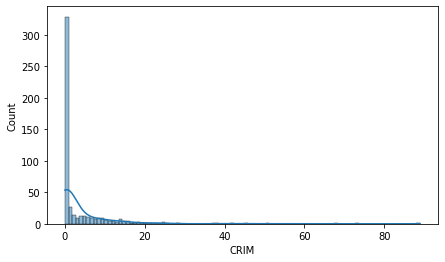

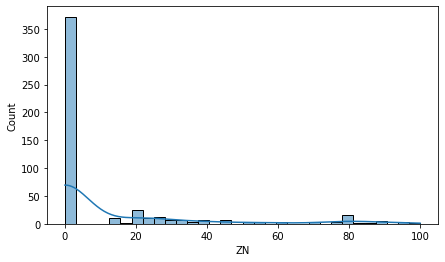

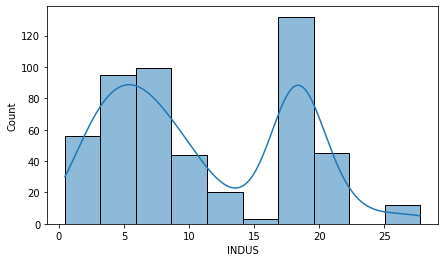

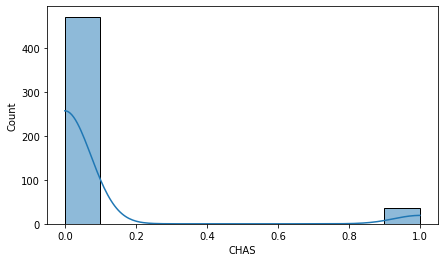

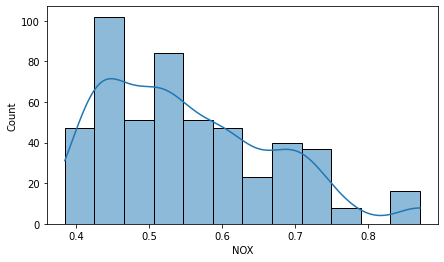

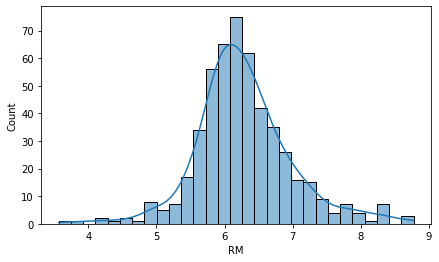

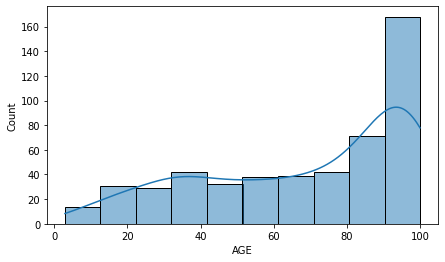

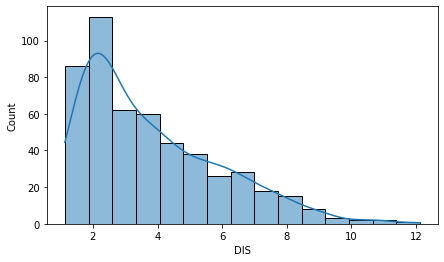

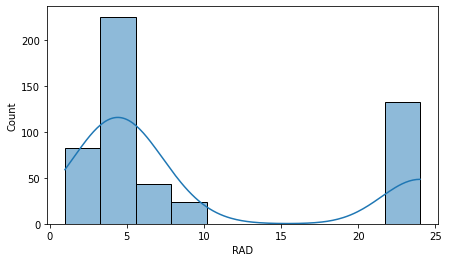

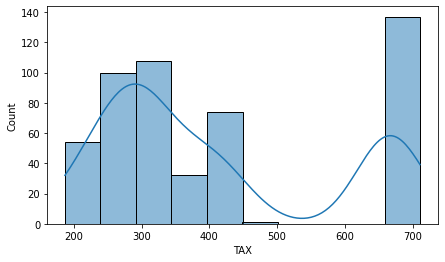

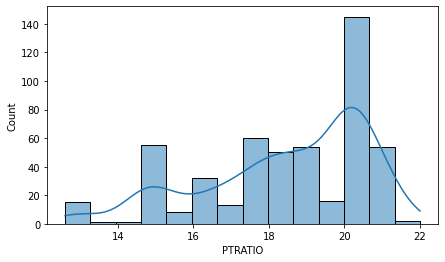

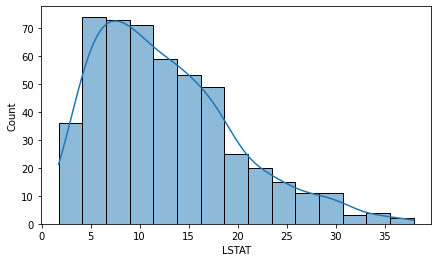

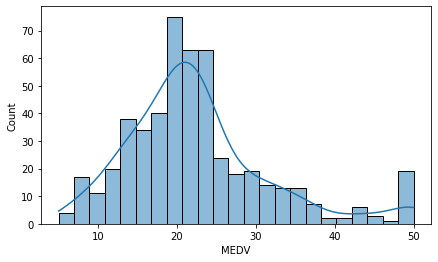

In [5]:
# Plot all the columns to look at their distributions
for i in df.columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=i, kde = True)
    plt.show()

**Observations**
* **The variables CRIM and ZN are positively skewed.** This suggests that most of the areas have lower crime rates and most residential plots are under the area of 25,000 sq. ft.
* **The variable CHAS, with only 2 possible values 0 and 1, follows a binomial distribution**, and the majority of the houses are away from Charles river (CHAS = 0).
* The distribution of the variable AGE suggests that many of the owner-occupied houses were built before 1940. 
* **The variable DIS** (average distances to five Boston employment centers) **has a nearly exponential distribution**, which indicates that most of the houses are closer to these employment centers.
* **The variables TAX and RAD have a bimodal distribution.**, indicating that the tax rate is possibly higher for some properties which have a high index of accessibility to radial highways.  
* The dependent variable MEDV seems to be slightly right skewed.

As the dependent variable is sightly skewed, we will apply a **log transformation on the 'MEDV' column** and check the distribution of the transformed column.

In [6]:
df['MEDV_log'] = np.log(df['MEDV'])

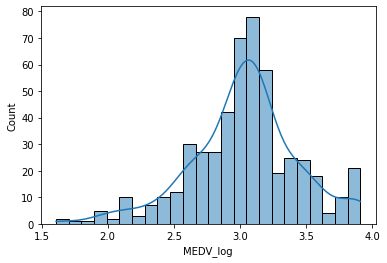

In [7]:
sns.histplot(data=df, x='MEDV_log', kde = True)

**Observations**
* The log-transformed variable (**MEDV_log**) appears to have a **nearly normal distribution without skew**, and hence we can proceed.

Before creating the linear regression model, it is important to check the bivariate relationship between the variables. Let's check the same using the heatmap and scatterplot.

### Bivariate Analysis

#### To begin the bivariate analysis, let's check the correlation of each pair of variables using a heatmap.

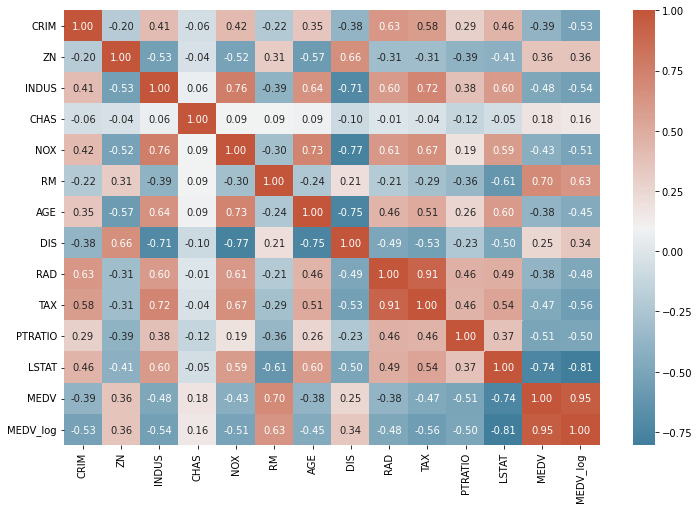

In [8]:
# Plot a heatmap displaying the correlation between each pair of variables
plt.figure(figsize=(12,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap=cmap ) #write your code here
plt.show()

**Observations:**
- DIS and AGE/NOX/INDUS are pretty heavily negatively correlated.
- Tax is almost linearly correlated with RAD
- INDUS has mid-heavy correlation with most other categories.
- CHAS does not seem to show much of a correlation to anything else.
- Most categories have a moderate level of positive or negative correlation with other categories.

Now, we will visualize the relationship between the pairs of features having significant correlations.

### Visualizing the relationship between the features having significant correlations (> 0.7) 

We will begin by creating a scatter plot to visualize the relationship between the features having significant correlations (>0.7).

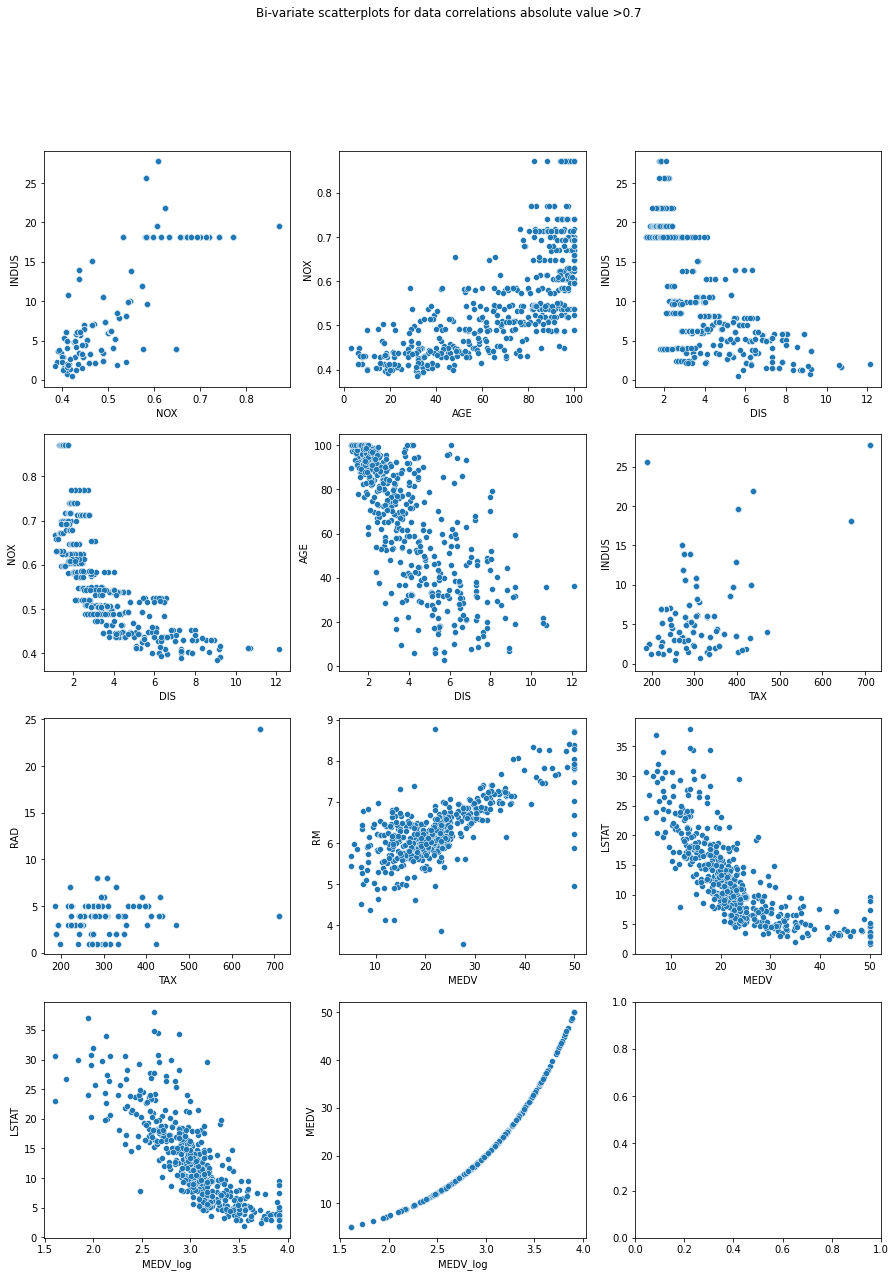

In [9]:
# Create a scatterplot to visualize the relationship between NOX and INDUS
fig, axes = plt.subplots(4, 3, figsize=(15, 20))
fig.suptitle('Bi-variate scatterplots for data correlations absolute value >0.7')
sns.scatterplot(x='NOX', y='INDUS', data=df, ax=axes[0][0])
sns.scatterplot(x='AGE', y='NOX', data=df, ax=axes[0][1])
sns.scatterplot(x='DIS', y='INDUS', data=df, ax=axes[0][2])
sns.scatterplot(x='DIS', y='NOX', data=df, ax=axes[1][0])
sns.scatterplot(x='DIS', y='AGE', data=df, ax=axes[1][1])
sns.scatterplot(x='TAX', y='INDUS', data=df, ax=axes[1][2])
sns.scatterplot(x='TAX', y='RAD', data=df, ax=axes[2][0])
sns.scatterplot(x='MEDV', y='RM', data=df, ax=axes[2][1])
sns.scatterplot(x='MEDV', y='LSTAT', data=df, ax=axes[2][2])
sns.scatterplot(x='MEDV_log', y='LSTAT', data=df, ax=axes[3][0])
sns.scatterplot(x='MEDV_log', y='MEDV', data=df, ax=axes[3][1])
plt.show()

**Observations:**
- There seem to be significant trends in the relationships in each of these scatterplots except for TAX/RAD.
- Some of these relationships seem very strong, such as in the plots between DIS/NOX and MEDV/LSTAT.

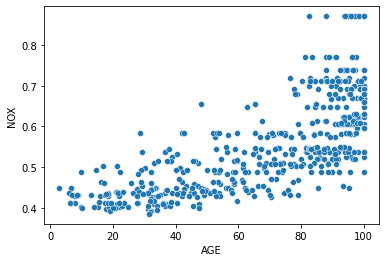

In [10]:
# Create a scatterplot to visualize the relationship between AGE and NOX
sns.scatterplot(x='AGE', y='NOX', data=df)
plt.show()

**Observations:**
- There is a significant positive correlation between the proportion of properties constructed before 1940 (AGE) and the NOX content and we can see a positive trend.

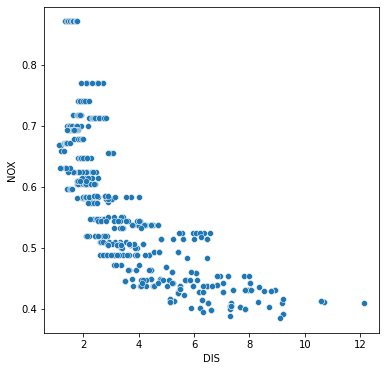

In [11]:
# Create a scatterplot to visualize the relationship between DIS and NOX
plt.figure(figsize=(6, 6))
sns.scatterplot(x='DIS', y='NOX', data=df)
plt.show()

**Observations:**
- There is a very significant negative correlation between the distance to the employment centers (DIS) and NOX content and the negative trend is apparent.

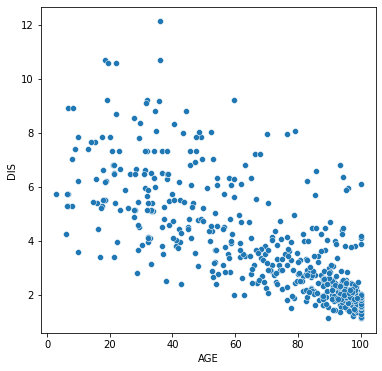

In [12]:
# Create a scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'AGE', y = 'DIS', data = df)
plt.show()

**Observations:**
* The distance of the houses to the Boston employment centers appears to decrease moderately as the the proportion of the old houses increase in the town. It is possible that the Boston employment centers are located in the established towns where proportion of owner-occupied units built prior to 1940 is comparatively high.

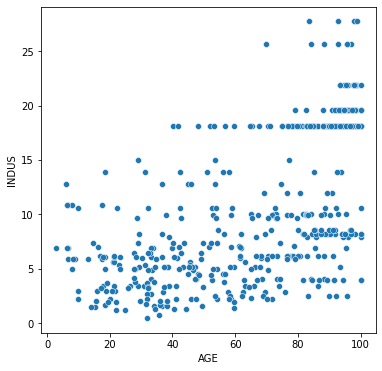

In [13]:
# Create a scatterplot to visualize the relationship between AGE and INDUS
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'AGE', y = 'INDUS', data = df)
plt.show()

**Observations:**
* No trend between the two variables is visible in the above plot.

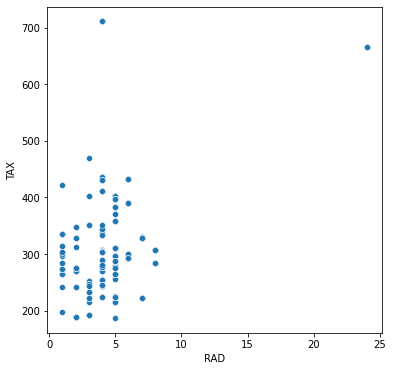

In [14]:
# Create a scatterplot to visulaize the relationship between RAD and TAX
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'RAD', y = 'TAX', data = df)
plt.show()

**Observations:**
* The correlation between RAD and TAX is very high. But, no trend is visible between the two variables. 
This might be due to outliers. 

Let's check the correlation after removing the outliers.

In [15]:
# Remove the data corresponding to high tax rate
df1 = df[df['TAX'] < 600]
# Import the required function
from scipy.stats import pearsonr
# Calculate the correlation
print('The correlation between TAX and RAD is', pearsonr(df1['TAX'], df1['RAD'])[0])

The correlation between TAX and RAD is 0.24975731331429196


So the high correlation between TAX and RAD is due to the outliers. The tax rate for some properties might be higher due to some other reason.

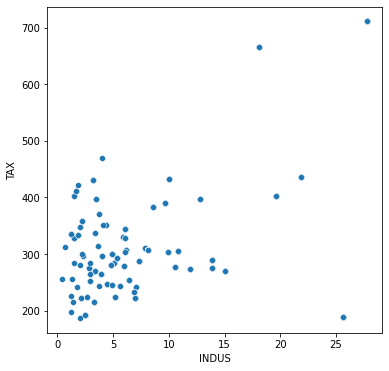

In [16]:
# Create a scatterplot to visualize the relationship between INDUS and TAX
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'INDUS', y = 'TAX', data = df)
plt.show()

**Observations:**
* The tax rate appears to increase with an increase in the proportion of non-retail business acres per town. This might be due to the reason that the variables TAX and INDUS are related with a third variable.

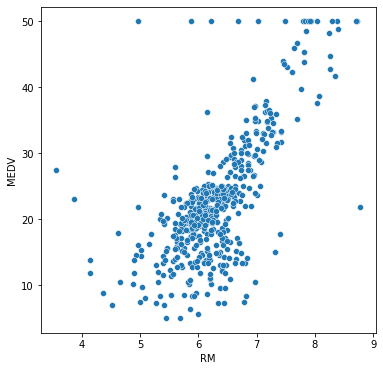

In [17]:
# Create a scatterplot to visulaize the relationship between RM and MEDV
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'RM', y = 'MEDV', data = df)
plt.show()

**Observations:**
* The price of the house seems to increase as the value of RM increases. This is expected as the price is generally higher for more rooms.

* There are a few outliers in a horizontal line as the MEDV value seems to be capped at 50.

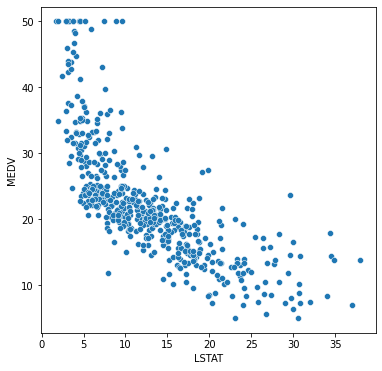

In [18]:
# Create scatterplot to visulaize the relationship between LSTAT and MEDV
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'LSTAT', y = 'MEDV', data = df)
plt.show()

**Observations:**
* The price of the house tends to decrease with an increase in LSTAT. This is also possible as the house price is lower in areas where lower status people live.
* There are few outliers and the data seems to be capped at 50.

We have seen that the variables LSTAT and RM have a linear relationship with the dependent variable MEDV. Also, there are significant relationships among a few independent variables, which is not desirable for a linear regression model. Let's first split the dataset.

### Split the dataset
Let's split the data into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test set.

In [19]:
# Separate the dependent and independent variables
Y = df['MEDV_log']
X = df.drop(columns = {'MEDV', 'MEDV_log'})

# Add the intercept term
X = sm.add_constant(X)

In [20]:
# Split the data in a 70:30 ratio of training to testing data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

Next, we will check the multicollinearity in the train dataset.

### Check for Multicollinearity

We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

Features having a VIF score > 5 will be dropped/treated till all the features have a VIF score < 5

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# A function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculate the VIF for each feature
    vif["VIF"] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]
    return vif

# Print the VIF for the training data
print(checking_vif(X_train))

    feature         VIF
0     const  535.372593
1      CRIM    1.924114
2        ZN    2.743574
3     INDUS    3.999538
4      CHAS    1.076564
5       NOX    4.396157
6        RM    1.860950
7       AGE    3.150170
8       DIS    4.355469
9       RAD    8.345247
10      TAX   10.191941
11  PTRATIO    1.943409
12    LSTAT    2.861881


**Observations:**
* There are two variables with a high VIF - RAD and TAX. Let's remove TAX as it has the highest VIF values and check the multicollinearity again.

Now we will drop the column 'TAX' from the training data and check if multicollinearity is removed.

In [22]:
# Create the model after dropping TAX
X_train = X_train.drop(columns='TAX')

# Check for VIF
print(checking_vif(X_train))

    feature         VIF
0     const  532.025529
1      CRIM    1.923159
2        ZN    2.483399
3     INDUS    3.270983
4      CHAS    1.050708
5       NOX    4.361847
6        RM    1.857918
7       AGE    3.149005
8       DIS    4.333734
9       RAD    2.942862
10  PTRATIO    1.909750
11    LSTAT    2.860251


Now, we will create the linear regression model as the VIF is less than 5 for all the independent variables, and we can assume that multicollinearity has been removed between the variables.

We will now create the linear regression model and print the model summary.

In [23]:
# Create the model
model1 = sm.OLS(y_train, X_train).fit()

# Obtain the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     103.3
Date:                Sun, 10 Oct 2021   Prob (F-statistic):          1.40e-101
Time:                        22:47:14   Log-Likelihood:                 76.596
No. Observations:                 354   AIC:                            -129.2
Df Residuals:                     342   BIC:                            -82.76
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6324      0.243     19.057      0.000       4.154       5.111
CRIM          -0.0128      0.002     -7.445      0.000      -0.016      -0.009
ZN             0.0010      0.001      1.425      0.155      -0.000       0.002
INDUS         -0.0004      0.003     -0.148      0.883      -0.006       0.005
CHAS           0.1196      0.039      3.082      0.002       0.043       0.196
NOX           -1.0598      0.187     -5.675      0.000      -1.427      -0.692
RM             0.0532      0.021      2.560      0.011       0.012       0.094
AGE            0.0003      0.001      0.461      0.645      -0.001       0.002
DIS           -0.0503      0.010     -4.894      0.000      -0.071      -0.030
RAD            0.0076      0.002      3.699      0.000       0.004       0.012
PTRATIO       -0.0452      0.007     -6.659      0.000      -0.059      -0.032
LSTAT         -0.0298      0.002    -12.134      0.000      -0.035      -0.025
==============================================================================
Omnibus:                       30.699   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.718
Skew:                           0.372   Prob(JB):                     6.62e-19
Kurtosis:                       5.263   Cond. No.                     2.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Observations:**
- We can see the R-squared for the model is 0.769
- We can also see the Adjusted R-squared for the model is 0.761
- There are 3 variables that are statistically insignificant: ZN, INDUS, and AGE. These can be dropped from the model.

**Next, we will drop insignificant variables from the above model and create the regression model again.**

### Examining the significance of the model

It is not enough to fit a multiple regression model to the data, it is necessary to check whether all the regression coefficients are significant or not. Significance here means whether the population regression parameters are significantly different from zero. 

From the above it may be noted that the regression coefficients corresponding to ZN, AGE, and INDUS are not statistically significant at level α = 0.05. In other words, the regression coefficients corresponding to these three are not significantly different from 0 in the population. Hence, we will eliminate the three features and create a new model.

In [24]:
# Create the model after dropping columns 'MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS' from df dataframe
Y = df['MEDV_log']
X = df.drop(columns={'MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS'})
X = sm.add_constant(X)

# Split the data in 70:30 ratio of training to testing data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

# Create the model
model2 = sm.OLS(y_train, X_train).fit()
# Get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     142.1
Date:                Sun, 10 Oct 2021   Prob (F-statistic):          2.61e-104
Time:                        22:48:39   Log-Likelihood:                 75.486
No. Observations:                 354   AIC:                            -133.0
Df Residuals:                     345   BIC:                            -98.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6494      0.242     19.242      0.000       4.174       5.125
CRIM          -0.0125      0.002     -7.349      0.000      -0.016      -0.009
CHAS           0.1198      0.039      3.093      0.002       0.044       0.196
NOX           -1.0562      0.168     -6.296      0.000      -1.386      -0.726
RM             0.0589      0.020      2.928      0.004       0.019       0.098
DIS           -0.0441      0.008     -5.561      0.000      -0.060      -0.028
RAD            0.0078      0.002      3.890      0.000       0.004       0.012
PTRATIO       -0.0485      0.006     -7.832      0.000      -0.061      -0.036
LSTAT         -0.0293      0.002    -12.949      0.000      -0.034      -0.025
==============================================================================
Omnibus:                       32.514   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.354
Skew:                           0.408   Prob(JB):                     1.07e-19
Kurtosis:                       5.293   Cond. No.                         690.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observations:**
* We can see that the **R-squared value has decreased by 0.002**, since we have removed variables from the model, whereas the **adjusted R-squared value has increased by 0.001**, since we removed statistically insignificant variables only.

Now, we will check the linear regression assumptions.

### Check the below linear regression assumptions

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**

#### Check for mean residuals

In [25]:
# Obtain the residuals from the model
residuals = model2.resid
# Print the mean of the residuals
residuals.mean()

-4.9483330176654576e-15

**Observations:**
- The mean of the residuals is extremely close to 0, so the first assumption for linear regression holds.

#### Check for homoscedasticity

* Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to homoscedastic.

* Heteroscedasticity - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

* We'll use `Goldfeldquandt Test` to test the following hypothesis with alpha = 0.05:

    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedastic

In [26]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [27]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(y_train, X_train)
lzip(name, test)

[('F statistic', 1.0835082923425279), ('p-value', 0.3019012006766915)]

**Observations:**
- The p-value above is above the alpha = 0.05, so we fail to reject the null hypothesis. This implies the resuiduals are homoscedastic, implying the second assumption of linear regression holds.

#### Linearity of variables

It states that the predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

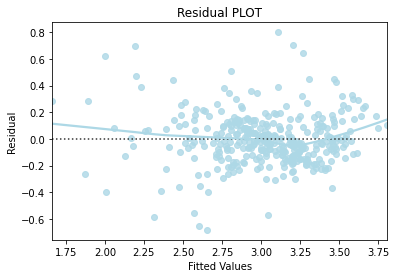

In [28]:
# Obtain predicted values
fitted = model2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color="lightblue", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

**Observations:**
- There does not look to be a pattern in the residuals vs the fitted values. Hence the variables are linear and the third assumption holds.

#### Normality of error terms
The residuals should be normally distributed.

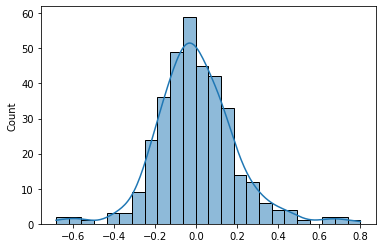

In [29]:
# Plot histogram of residuals
sns.histplot(residuals, kde=True)

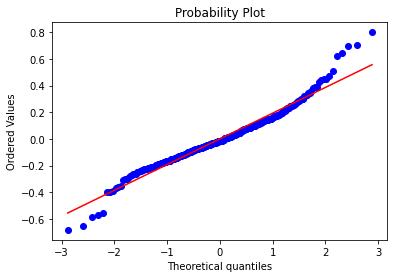

In [30]:
# Plot the q-q plot of residuals
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
plt.show()

**Observations:**
- We can see that the histogram and Q-Q plot imply that the residuals are normally distributed. Hence all four assumptions necessary for linear regression hold.

### Check the performance of the model on the train and test data set

Now we need to compare the model performance on training and testing datasets. To make this easier, we will define a few functions to calculate error and measure performance.

In [31]:
# RMSE - Root Mean Squared Error
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE - Mean Absolute Percentage Error
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE - Mean Absolute Error
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )


# Checking model performance
model_pref(model2, X_train, X_test)  

    Data      RMSE       MAE      MAPE
0  Train  0.195504  0.143686  4.981813
1   Test  0.198045  0.151284  5.257965


**Observations:**
- Each of the metrics for evaluating error are very similar under the training data and the test data.  The model seems to be performing similarly for each dataset.

#### Apply cross validation to improve the model and evaluate it using different evaluation metrics

We will now apply the cross validation technique to improve the model and evaluate it using different evaluation metrics.

In [33]:
# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model
linearregression = LinearRegression()                                    

# Cross validate
cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10, scoring = 'neg_mean_squared_error')                              

# Print the metrics
print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.729 (+/- 0.232)
Mean Squared Error: 0.041 (+/- 0.023)


**Observations**
- The R-squared on the cross validation is 0.729, whereas on the training dataset it was 0.769
- And the MSE on cross validation is 0.041, whereas on the training dataset it was 0.038

We may want to reiterate the model building process again with new features or better feature engineering to increase the R-squared and decrease the MSE on cross validation.

We will now determine the equation for the fit of the model.

In [34]:
# Obtain the model coefficient parameters
coef = model2.params

In [35]:
# Determine the equation of the line of best fit
Equation = "log (Price) ="
print(Equation, end='\t')
for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

log (Price) =	( 4.649385823266631 ) *  const + ( -0.012500455079103932 ) *  CRIM + ( 0.11977319077019646 ) *  CHAS + ( -1.0562253516683255 ) *  NOX + ( 0.05890657510928035 ) *  RM + ( -0.0440688907994056 ) *  DIS + ( 0.007848474606243588 ) *  RAD + ( -0.04850362079499836 ) *  PTRATIO + ( -0.029277040479796942 ) *  LSTAT + 

#### **Question 11:** Write the conclusions and business recommendations derived from the model. (5 Marks)

**Conclusions**
We have constructed a model with which we can obtain a reasonably close prediction of the median cost of a house in Boston based on each of the categories listed in the original dataset using the function above. It is worth noting that the R-squared after cross validation is 0.729, which implies reasonably high correlation. Typically an R-squared value higher than 0.9 would indicate a better fit for the model.  From a financial standpoint predicting the median value of a house in Boston, the current model should be good enough to obtain a good prediction, but it is important to note, that it is not perfect.

**Recommendations**
This model seems to predict the house price in the Boston area very well.  It can very well be used as a baseline for determining the cost or value of a house.  This can be used to the advantage of the business in either buying or selling properties.  Using this last equation, we can obtain a relatively accurate price using some known information. The business can use this knowledge as leverage in any pricing negotiations.